<header style="width: 100%; background-color: #eaeaea;">
    <br>
    <h1 style="text-align: center;">Praktikum Metode Seismik: Pertemuan 2</h1>
    <br>
    <br>
</header>

## Overview
1. [Data Sintetik x-t](#Data-Sintetik-x-t)
    * [Ricker wavelet](#Ricker-wavelet)
    * [Konvolusi koefisien refleksi dengan ricker wavelet](#Konvolusi-koefisien-refleksi-dengan-ricker-wavelet)
    * [Koefisien refleksi](#Koefisien-refleksi)
    * [Data sintetik](#Data-sintetik)
    * [Data sintetik + noise](#Data-sintetik-+-noise)

## Data Sintetik x-t

In [1]:
from scipy.signal import convolve
import numpy as np
import matplotlib.pyplot as plt

### Ricker wavelet

In [2]:
def ricker(f,tn,dt):
    t = np.arange(-tn/2,tn/2+dt,dt)/1000
    w = (1-2*np.pi**2*f**2*t**2)*np.exp(-np.pi**2*f**2*t**2)
    return t, w

dt = 4
ntraces = 51 # banyak geophone
ns = 200 # lama waktu

t,w = ricker(25,100,dt)  #freq, length, sr f15

(-0.055, 0.055)

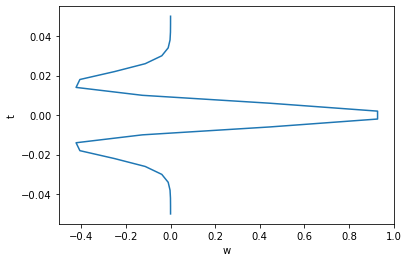

In [3]:
plt.plot(w,t)
plt.xlabel('w')
plt.xlim(-0.5, 1)
plt.ylabel('t')
plt.ylim(-0.055,0.055)

In [4]:
offset = np.linspace(0.,50,50)
y1 = np.linspace(0.,200.,200)

### Konvolusi koefisien refleksi dengan ricker wavelet

In [5]:
ref = [] # reflektivitas
traces = []
for i in range(ntraces):
    R = np.zeros(ns)
    R[52+i] = -0.7
    R[50] = 0.8
    tr = convolve(R,w, mode = 'same') # konvolusi antara reflektivitas dengan ricker wavelet
    ref.append(R)
    traces.append(tr)

### Koefisien refleksi

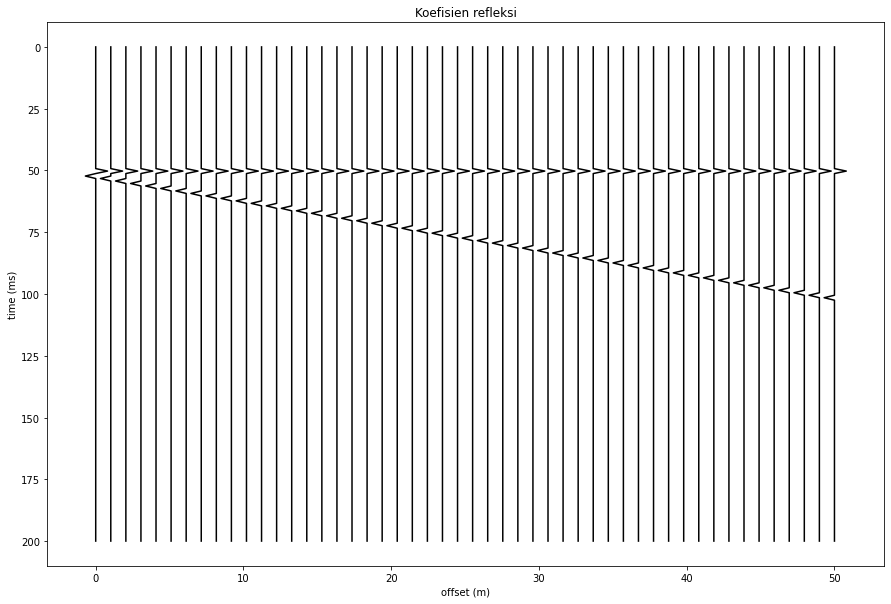

In [6]:
plt.figure(figsize=(15,10))
for i in range(ntraces-1):
    rr = np.transpose(ref[i]) + offset[i]
    plt.plot(rr,y1, 'k')
plt.title('Koefisien refleksi')
plt.xlabel('offset (m)')
plt.ylabel('time (ms)')
plt.gca().invert_yaxis()
plt.show()

### Data sintetik

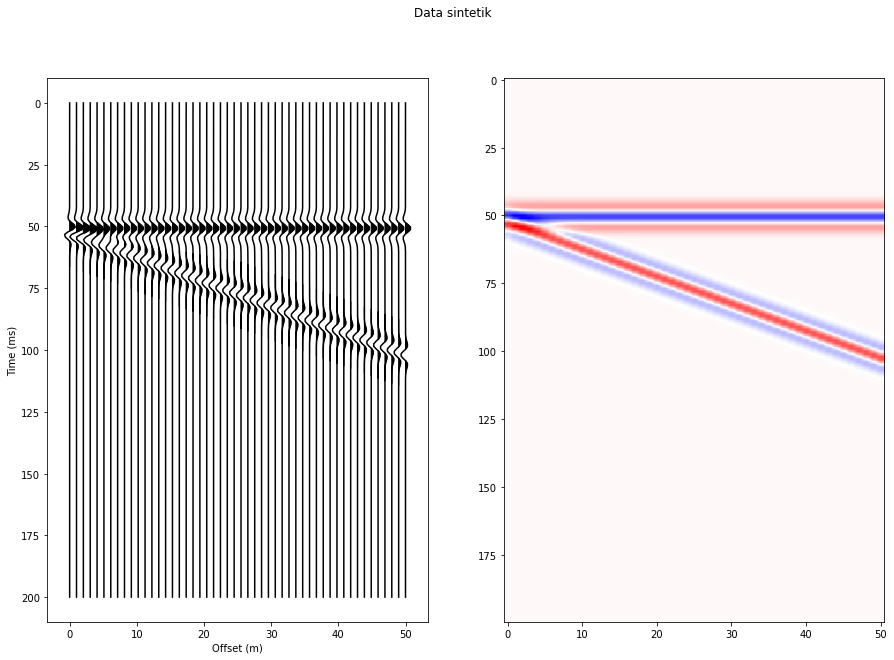

In [7]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Data sintetik')

for i in range(ntraces-1):
    r = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r,where=(r>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
# ax[0].plot(np.transpose(traces[0])+0,y1,'r')
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()

### Data sintetik + noise

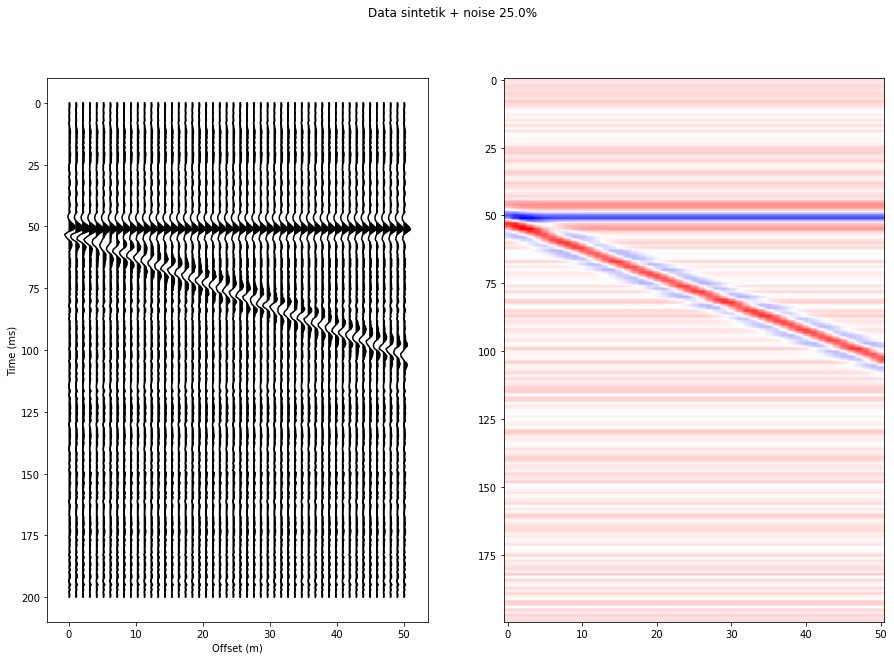

In [8]:
persentase = 0.25
noise = np.random.random(200) * persentase # noise 25%
traces = traces + noise

fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle(f'Data sintetik + noise {persentase*100}%')

for i in range(ntraces-1):
    r2 = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r2,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r2,where=(r2>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
# ax[0].plot(np.transpose(traces[0])+0,y1,'r')
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()

<footer style="width: 100%; background-color: #eaeaea;">
    <br>
    <p style="text-align: center;">Made with 🚀 2021 Yusuf Umar Al Hakim. All Rights Reserved</p>
    <br>
</footer>